## Lecture Note

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [2]:
import seaborn as sns

In [5]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset='salary_year_avg')

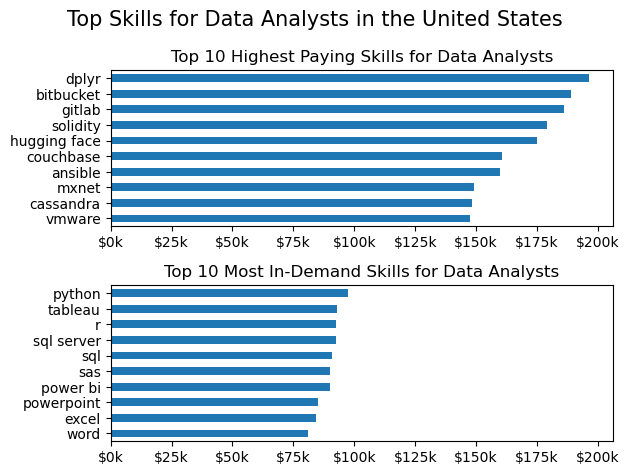

In [6]:
df_da_us_exploded = df_da_us.explode('job_skills').copy()
df_da_med_count = (df_da_us_exploded.groupby('job_skills')['salary_year_avg']
                 .agg(['median','count'])
)
df_da_top_pay = df_da_med_count.sort_values(by='median',ascending=False).head(10)
df_da_top_skill = df_da_med_count.sort_values(by='count',ascending=False).head(10)
df_da_top_skill = df_da_top_skill.sort_values(by='median',ascending=False)
fig, ax = plt.subplots(2,1)
df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
df_da_top_skill.plot(kind='barh',y='median',ax=ax[1],legend=False)

ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[0].invert_yaxis()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.suptitle('Top Skills for Data Analysts in the United States', fontsize=15)
plt.tight_layout()
plt.show()

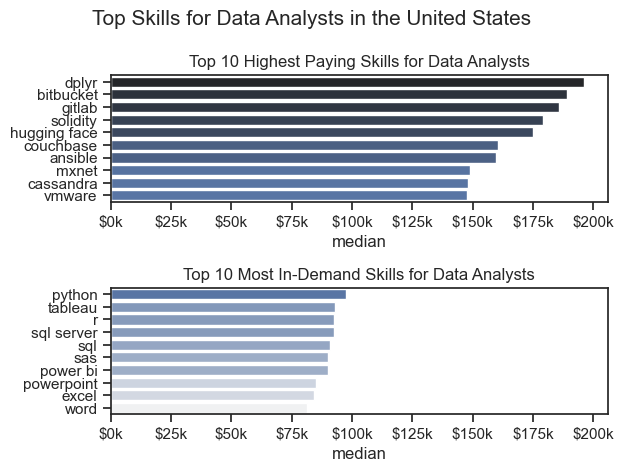

In [18]:
df_da_us_exploded = df_da_us.explode('job_skills').copy()
df_da_med_count = (df_da_us_exploded.groupby('job_skills')['salary_year_avg']
                 .agg(['median','count'])
)
df_da_top_pay = df_da_med_count.sort_values(by='median',ascending=False).head(10)
df_da_top_skill = df_da_med_count.sort_values(by='count',ascending=False).head(10)
df_da_top_skill = df_da_top_skill.sort_values(by='median',ascending=False)
fig, ax = plt.subplots(2,1)

# df_da_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
# df_da_top_skill.plot(kind='barh',y='median',ax=ax[1],legend=False)

sns.set_theme(style='ticks')
sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index,ax=ax[0], hue='median',palette='dark:b_r')
sns.barplot(data=df_da_top_skill, x='median', y=df_da_top_skill.index,ax=ax[1], hue='median',palette='light:b')


ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)

ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
# ax[0].invert_yaxis()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
# ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.suptitle('Top Skills for Data Analysts in the United States', fontsize=15)
plt.tight_layout()
plt.show()

Text(12.444444444444445, 0.5, 'Number of Jobs')

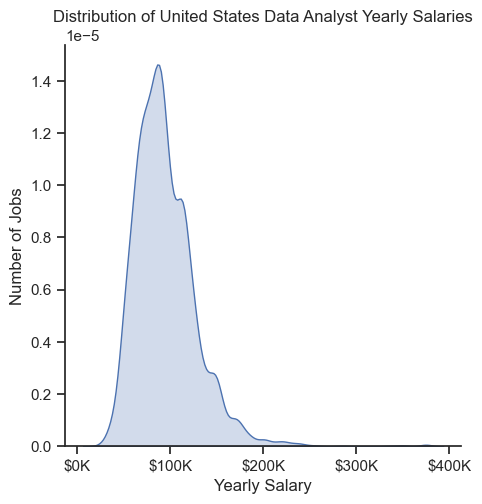

In [25]:
df_us = df[df['job_country']=='United States'].copy()
df_da_us = df_us[df_us['job_title_short']=='Data Analyst']
# df_da_us['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
# plt.xlim(0,250000)
sns.set_theme(style='ticks')
sns.displot(data=df_da_us['salary_year_avg'],kind='kde',fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

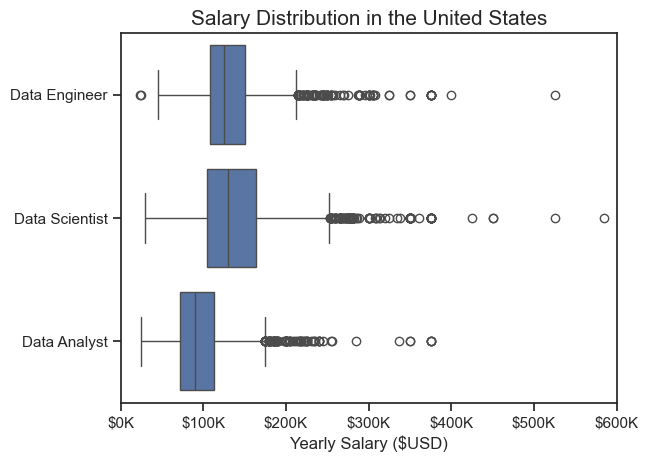

In [30]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])
job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
job_list[0]
sns.boxplot(data=df_us, x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution in the United States',fontsize=15)
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

## Homework

C:\Users\Thomas\AppData\Local\Temp\ipykernel_32536\951043411.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_company, x='median',y='company_name', palette='light:b_r')


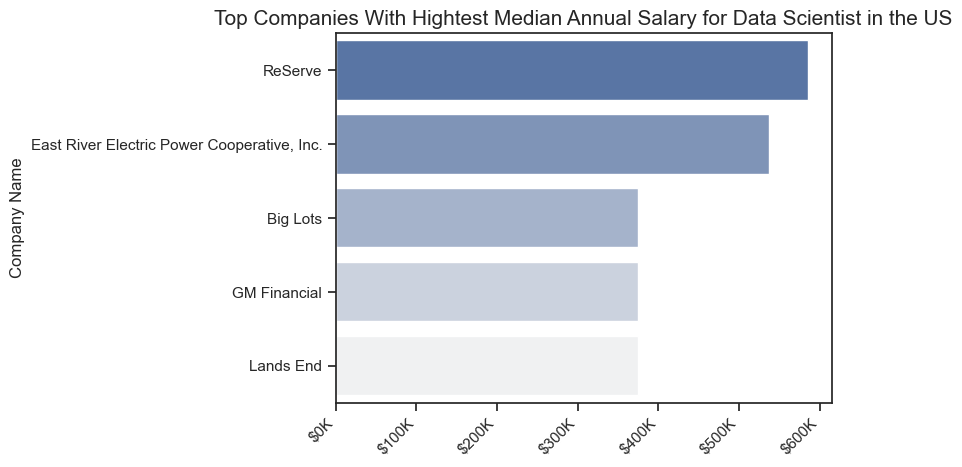

In [93]:
df_ds_us = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()
df_ds_us = df_ds_us.dropna(subset='salary_year_avg')
df_top_company = (
    df_ds_us.groupby('company_name')['salary_year_avg'].median()
    .reset_index(name='median')
    .sort_values(by='median', ascending=False)
    .head()
)

sns.barplot(data=df_top_company, x='median',y='company_name', palette='light:b_r')
plt.xlabel('')
plt.ylabel('Company Name')
plt.title('Top Companies With Hightest Median Annual Salary for Data Scientist in the US',fontsize=15)
plt.xticks(rotation=45,ha='right')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


Text(0.5, 0, 'Yearly Salary (USD)')

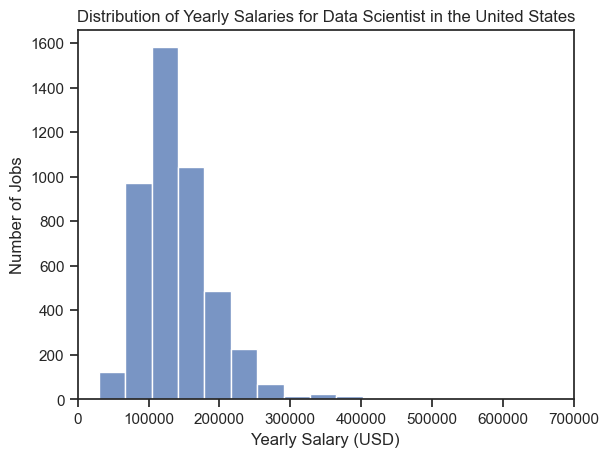

In [104]:
df_ds_us = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()
df_ds_us = df_ds_us.dropna(subset='salary_year_avg')
sns.histplot(df_ds_us['salary_year_avg'], bins=25, kde=False)
plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary (USD)')

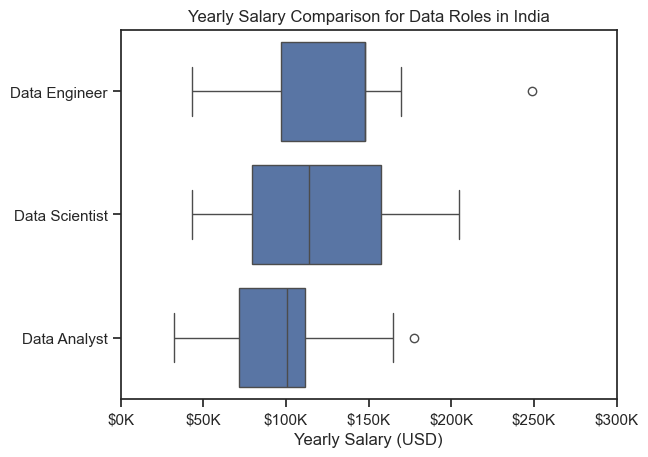

In [119]:
# Data Cleaning
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_india = df[df['job_country']=='India'].copy()
df_data_india = df_india[df_india['job_title_short'].isin(job_titles)]
df_data_india = df_data_india.dropna(subset='salary_year_avg')
#Plotting
sns.boxplot(data=df_data_india,x='salary_year_avg',y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.ylabel('')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0,300000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

(0.0, 450000.0)

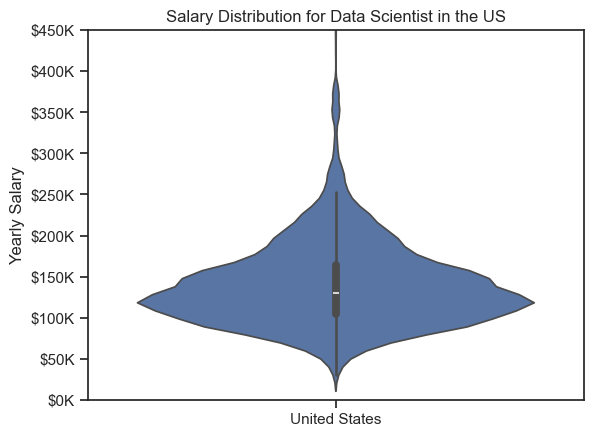

In [125]:
sns.violinplot(data=df_ds_us,x='job_country',y='salary_year_avg')
plt.xlabel('')
plt.ylabel('Yearly Salary')
plt.title('Salary Distribution for Data Scientist in the US')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
plt.ylim(0,450000)